# Import Data and Defining Function

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


# Data Understanding

**Saudi Arabia Used Cars**

**Context**
The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.
- Type: Type of used car.
- Region: The region in which the used car was offered for sale.
- Make: The company name.
- Gear_Type: Gear type size of used car.
- Origin: Origin of used car.
- Options: Options of used car.
- Year: Manufacturing year.
- Engine_Size: The engine size of used car.
- Mileage: Mileage of used car	
- Negotiable: True if the price is 0, that means it is negotiable.
- Price: Used car price.

These are columns details:

In [169]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]); 

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3,..."
1,Region,object,0,0.0,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ..."
2,Make,object,0,0.0,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche,..."
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Gulf Arabic, Other, Unknown]"
5,Options,object,0,0.0,3,"[Standard, Full, Semi Full]"
6,Year,int64,0,0.0,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 199..."
7,Engine_Size,float64,0,0.0,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5, 4.6, ..."
8,Mileage,int64,0,0.0,1716,"[421000, 80000, 140000, 220000, 49000, 25000, ..."
9,Negotiable,bool,0,0.0,2,"[True, False]"


# Pre-Processing

## Unnecessary Column Handling

All available columns represent clear and meaningful values. There is no need to drop any of them.

## Data-Type Handling

In [170]:
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

All data types in each column are already appropriate. No further adjustments are needed.

## Missing Value Handling

In [171]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [172]:
len(df.isna())/len(df) *100

100.0

No missing values were found in each column. No further handling is required.

## Anomaly Handling

### Outliers Handling

Extreme outliers, that may disrupt the upcoming modeling process will be removed. The reason normal outliers, 1.5 times IQR, won't be removed is that it may show natural shape of data distribution.

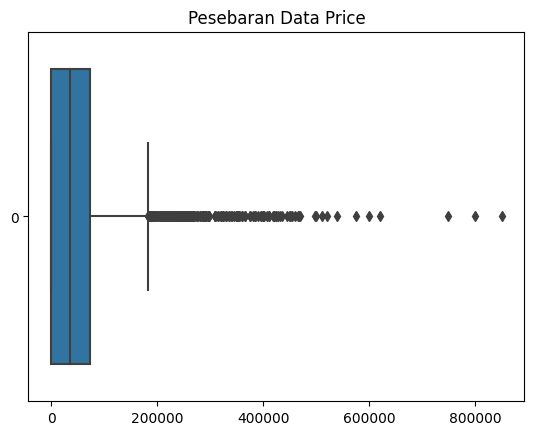

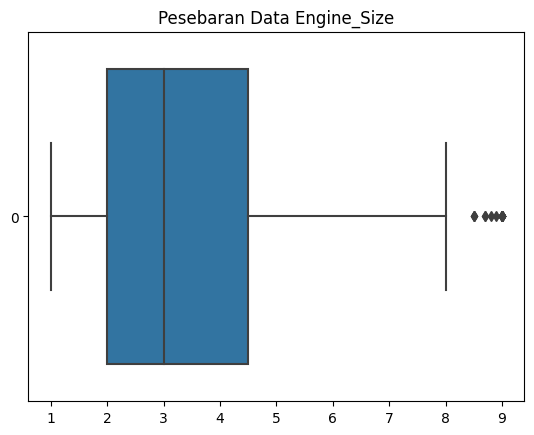

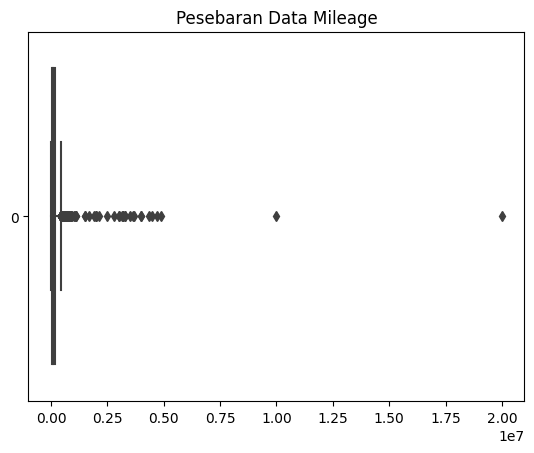

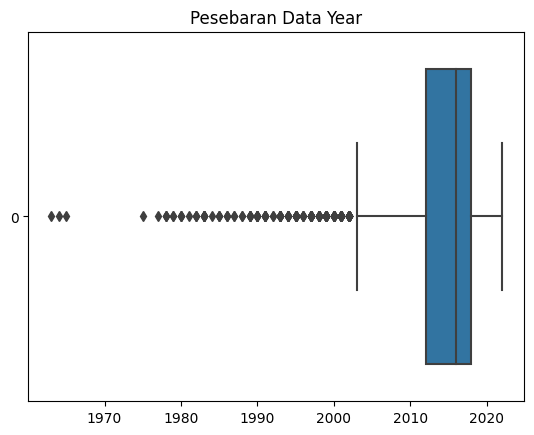

In [8]:
listkol = ['Price','Engine_Size','Mileage','Year']

for i in listkol:
    plt.figure()
    sns.boxplot(df[i].reset_index(drop=True), orient='h')
    plt.title(f'Pesebaran Data {i}')
    plt.show()

In [173]:
def cleanExtremeOutliers(dataframe,field,detail=''):
    q1 = dataframe[field].describe()['25%']
    q3 = dataframe[field].describe()['75%']
    IQR = q3 - q1
    lowerBound = q1 - (3*IQR)
    upperBound = q3 + (3*IQR)
    
    dfExcludeOutliers = dataframe[dataframe[field].between(lowerBound,upperBound)]
    return dfExcludeOutliers

In [174]:
df = cleanExtremeOutliers(df,'Price')
df = cleanExtremeOutliers(df,'Engine_Size')
df = cleanExtremeOutliers(df,'Mileage')
df = cleanExtremeOutliers(df,'Year')

## Another Anomaly Data Treatment

* Year: After conducting data verification, it was found that the lowest year recorded is 1963, which corresponds to a Ford car. Additional research on the internet confirmed the existence of Ford cars manufactured in 1963. Consequently, no rows were excluded for the Year field.

* Engine_Size: A box plot examination revealed no extreme outliers for the Engine_Size feature. As a result, no rows were dropped for this variable.

* Mileage: Further investigation is needed for extreme data points in the Mileage column.

* Price: There are extreme data points in the Price column that require further examination.

### Mileage

In [175]:
print('Findings:')
dfTemp = df[df['Mileage']>7500000]
display(dfTemp)

Findings:


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In this field, data with mileage values of 9,999,999 and 20,000,000 were found. Both of these data points are dropped due to an assumption of input data error. The input data error is suspected based on the considerable distance of these data points from the data center.

In [176]:
df.drop(dfTemp.index,inplace=True)
dfTemp = df[df['Mileage']>7500000]
display(dfTemp)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


### Price

In [177]:
dfAnomPrice = df[df['Price']>700000]
display(dfAnomPrice)
for i in dfTemp.iloc[:,0]:
    display(i)
    display(df[df['Type']==i].sort_values(['Year','Price']))

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In this field, after making more comparison and analysis, data with Price values for three car types were found, along with the following actions taken:

* Bentayga (Bentley): 850,000 -> No drop performed as there is no price comparison with the same car type in the same year.
* S (Mercedes): 748,000 -> No drop performed as the car is assumed to be the latest type available in the dataset (Year 2021) and there is no price comparison with the same car type in the same year. Thus, the high price can be attributed to the year the car was manufactured.
* G (Mercedes): 800,000 -> No drop performed as the car is assumed to be the latest type available in the dataset (Year 2019) and there is no price comparison with the same car type in the same year. Thus, the high price can be attributed to the year the car was manufactured.

### More Anomaly Data

Negotiable: True if the price is 0, that means it is negotiable.

In [178]:
df[df['Price']==0]['Negotiable'].value_counts()

Negotiable
True     1715
False       1
Name: count, dtype: int64

In [179]:
df[(df['Price']==0)&(df['Negotiable']==False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
3168,Furniture,Riyadh,Toyota,Automatic,Other,Semi Full,2012,2.7,225000,False,0


In [180]:
df = df.drop(df[(df['Price']==0)&(df['Negotiable']==False)].index)

One data point with a Price of 0 was found, but it falls into the category of "False." Therefore, this data point is dropped.

## Duplicate Handling

In [181]:
df[df.duplicated()==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,False,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,False,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,False,45000
5267,Camry,Riyadh,Toyota,Automatic,Saudi,Full,2013,2.5,185000,True,0


Duplicates were found in the dataframe; therefore, they need to be dropped.

In [182]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
df[df.duplicated()==True]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


# Data Preparation Review and Export Cleansed Data

In [183]:
display(f'total rows: {len(df)}',df.describe(), df.describe(exclude='number'))

'total rows: 5381'

,Year,Engine_Size,Mileage,Price
count,5381.000000,5381.000000,5381.000000,5381.000000
mean,2014.607508,3.264022,130019.108902,48988.049247
std,4.455961,1.495610,115319.557736,55241.993024
min,1998.000000,1.000000,100.000000,0.000000
25%,2013.000000,2.000000,40000.000000,0.000000
50%,2016.000000,3.000000,103358.000000,37000.000000
75%,2018.000000,4.000000,192000.000000,72000.000000
max,2022.000000,9.000000,650000.000000,291500.000000


,Type,Region,Make,Gear_Type,Origin,Options,Negotiable
count,5381,5381,5381,5381,5381,5381,5381
unique,331,27,56,2,4,3,2
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,False
freq,249,2185,1374,4705,4047,2089,3667


In [184]:
df.to_csv('data_saudi_used_cars_cleaned.csv', index=False)